In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

sns.set(style="ticks")
raw_data = pd.read_csv('Loan.csv')


# droped all the rows that have In Grace period in the Status Column
raw_data = raw_data[raw_data['Status'] != 'In Grace Period']

'''
 from initial EDA found that:
  Droped Columns:
      - Months Since Last Delinquency, total = 612349 and Nan = 30922
      about 19 % and cannot infere that the Nan values = zero so I droped
      the column

      -'Revolving Line Utilization' does not have any impact as it shows the
      current limits an applicant is using (after being approved)

      - Months Since Last Record - had 44379 NuNs so I dropped it
  Droped Rows:
      - found 17 applicants did not have a fico score so I dropped applicants

      -found that 29 apllicants had Nan in all columns shown below:
      ['Open CREDIT Lines', 'Total CREDIT Lines', 'Revolving Line Utilization',
       'Inquiries in the Last 6 Months', 'Accounts Now Delinquent',
       'Delinquencies (Last 2 yrs)', 'Months Since Last Delinquency',
       'Public Records On File'] - dropped applicants
        - Revolving Credit Balance is taken at a specific time after loan has been approved so I dropped it
'''


data = raw_data.drop(['Months Since Last Delinquency', 'Revolving Line Utilization', 'Months Since Last Record', 'Accounts Now Delinquent', 'Revolving CREDIT Balance'], axis = 1)


data = data[data['Approx. Fico Score'].notna()]
data = data[data['Open CREDIT Lines'].notna()]

# change Object types using dummy
## Home ownership
data = pd.get_dummies(data, columns = ['Home Ownership'])


#Change Status to a True or False Boolean
data['Status'] = data['Status'].map({'Not Delinquent': 0, 'Delinquent': 1})

#change Loan Lenths months to an interger
data['Loan Length'] = data['Loan Length'].str.replace('months', '').astype(int)

#replace all employee lengths with Nan with average
data['Employment Length'].fillna((data['Employment Length'].mean()), inplace = True)

#grouby the delinquent and not delinquent
data_stat = data.groupby('Status').describe().reset_index()




#save a csv file with the infromation
'''
dt = data.drop(['Status', 'Home Ownership_ANY',
       'Home Ownership_MORTGAGE', 'Home Ownership_NONE', 'Home Ownership_OWN',
       'Home Ownership_RENT'], axis = 1)
columns = dt.columns

for x in columns:
    data_stat[x].to_csv('describe_data.csv',mode='a',line_terminator = '\n' + x)

print(data.columns)
'''


#change column names to be easier to write and read

data.columns = ['total_amount', 'loan_lenght', 'month_pay',
       'debt_income_ratio', 'month_income', 'fico_score',
       'open_credit_lines', 'tot_credit_lines',
       'inquiries_6_month',
       'del_last_2yrs', 'public_records',
       'employ_length', 'status', 'home_any',
       'home_mortage', 'home_none', 'home_own',
       'home_rent']

data = data.rename(columns={'total_amount' : 'Loan Amount', 'loan_lenght' : 'Loan Length', 'month_pay' : 'Monthly Payment',
        'debt_income_ratio' : 'Debt to Income Ratio','month_income' : 'Monthly Income', 'fico_score' : 'Fico Score',
        'open_credit_lines' : 'Open Credit Lines', 'tot_credit_lines' : 'Total Credit Lines', 'inquiries_6_month' : 'Inquiries 6 Months',
        'del_last_2yrs' : 'Delinquences last 2 yrs', 'public_records' : 'Public Records on File', 'employ_length' : 'Employment Length',
       'status': 'status', 'home_any' : 'Home: Any', 'home_mortage' : 'Home: Mortage', 'home_none' : 'Home: None', 'home_own' : 'Home: Own',
       'home_rent': 'Home: Rent'})

In [15]:
from scipy.stats import iqr


In [18]:
data['ewm_alpha_1']=data['Inquiries 6 Months'].ewm(alpha=0.1).mean()

In [19]:
data

,Loan Amount,Loan Length,Monthly Payment,Debt to Income Ratio,Monthly Income,Fico Score,Open Credit Lines,Total Credit Lines,Inquiries 6 Months,Delinquences last 2 yrs,Public Records on File,Employment Length,status,Home: Any,Home: Mortage,Home: None,Home: Own,Home: Rent,ewm_alpha_1
0,500,36,15.67,0.00,275.00,732.0,3.0,3.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0.000000
1,500,36,15.69,4.27,1500.00,732.0,4.0,4.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.000000
2,500,36,15.75,14.02,8333.33,732.0,4.0,6.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0.369004
3,500,36,15.76,2.15,2750.00,732.0,6.0,6.0,10.0,0.0,0.0,2.0,0,0,0,0,0,1,3.169526
4,500,36,15.91,0.00,166.67,695.0,2.0,2.0,6.0,0.0,0.0,0.0,1,0,0,0,0,1,3.860712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48594,35000,36,1318.45,9.94,10416.67,669.0,10.0,15.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0.911295
48595,35000,36,1327.27,10.93,10000.00,669.0,10.0,36.0,2.0,0.0,0.0,10.0,0,0,1,0,0,0,1.020166
48596,35000,36,1336.13,12.62,7250.00,669.0,10.0,13.0,0.0,0.0,0.0,3.0,0,0,0,0,0,1,0.918149
48597,35000,36,1336.13,17.33,7583.33,669.0,19.0,37.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0.926334


In [20]:
import seaborn as sns
sns.set(style="whitegrid",font="sans-serif")
sns.set(font_scale=1.2)

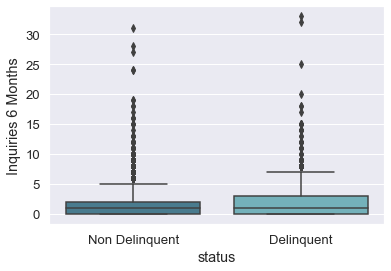

In [45]:
sns.boxplot(data['status'], data['Inquiries 6 Months'],  palette='GnBu_d')
plt.xticks(np.arange(2),['Non Delinquent', 'Delinquent'])
plt.savefig('EDA - graphs/Use this.png', bbox_inches='tight');
#plt.show()

In [5]:
plt.bar

0         0.0
1         0.0
2         1.0
3        10.0
4         6.0
         ... 
48594     1.0
48595     2.0
48596     0.0
48597     1.0
48598     0.0
Name: Inquiries 6 Months, Length: 48170, dtype: float64